Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.08461259109253
One-step MC price of an European put option is 7.955628170275105
Multi-step MC price of an European call option is 7.825071545484153
Multi-step MC price of an European put option is 7.970617114590759
One-step MC price of an Barrier call option is 8.073617530741199
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.817606645680331
Multi-step MC price of an Barrier put option is 1.2542830726850318


Text(0, 0.5, 'Price')

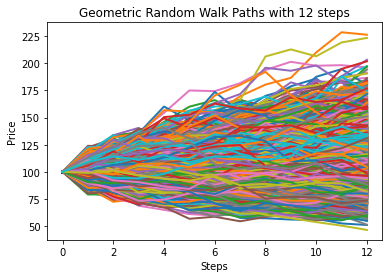

In [ ]:
import numpy as np
from numpy import *
from scipy.stats import norm
import matplotlib.pyplot as plt

# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier


# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
  # --------- Insert your code here --------- #
  # underlying stock day
  t=0
  # calculate d1
  d_1=(1/(sigma*np.sqrt(T-t)))*(np.log(S0/K)+(r+sigma**2/2)*(T-t))
  # calcualte d2
  d_2=d_1-sigma*np.sqrt(T-t)
  # price of call option
  c=norm.cdf(d_1)*S0-norm.cdf(d_2)*K*np.exp(-r*(T-t))
  # price of put option
  p=norm.cdf(-d_2)*K*np.exp(-r*(T-t))-norm.cdf(-d_1)*S0
  return c, p

def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
  # initialize paths
  paths = np.zeros((numSteps + 1, numPaths))
  # calcualte time increment
  dT = T / numSteps
  # store initial price
  paths[0]=[S0]*numPaths
  # generate paths
  for iPath in range(numPaths):
      for iStep in range(numSteps):
          paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
  # calculate the payoff for put
  PutPayoffT = np.maximum(K - paths[numSteps,:],0)
  # calculate the payoff for call
  CallPayoffT = np.maximum(paths[numSteps,:] - K, 0)
  # discount back
  p = np.mean(PutPayoffT) * np.exp(-r * T)
  c = np.mean(CallPayoffT) * np.exp(-r * T)

  return c, p,paths

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
  # initialize paths
  paths = np.zeros((numSteps + 1, numPaths))
  # calcualte time increment
  dT = T / numSteps
  # store initial price
  paths[0]=[S0]*numPaths
  # generate paths
  for iPath in range(numPaths):
      for iStep in range(numSteps):
          paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
  # determine if each path crosses the barrier
  crossed_paths=np.zeros(numPaths)
  for iPath in range(numPaths):
      if sum(paths[:,iPath]>Sb) > 0:
          crossed_paths[iPath]=1
      else:
         crossed_paths[iPath]=0
  # calcualte the payoff for put
  PutPayoffT = crossed_paths*np.maximum(K - paths[numSteps,:], 0)
  # calcualte the payoff for call
  CallPayoffT = crossed_paths*np.maximum(paths[numSteps,:] - K, 0)
  # discount back
  p = np.mean(PutPayoffT) * np.exp(-r * T)
  c = np.mean(CallPayoffT) * np.exp(-r * T)
  return c, p

# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 12;
numPaths = 10000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0,K,T,r,sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, paths_1_step= \
  MC_european_price(S0,K,T,r,mu,sigma,1,numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, paths_multi_step= \
  MC_european_price(S0,K,T,r,mu,sigma,numSteps,numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0,Sb,K,T,r,mu,sigma,1,numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0,Sb,K,T,r,mu,sigma,numSteps,numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

# Plot results
# --------- Insert your code here --------- #
[plt.plot(paths_multi_step[:,i], linewidth=2) for i in range(numPaths)]
plt.title('Geometric Random Walk Paths with {} steps'.format(numSteps))
plt.xlabel('Steps')
plt.ylabel('Price')

In [ ]:
# calcualte price for One-step Barrier with volatility increased by 10%
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0,Sb,K,T,r,mu,sigma*1.1,1,numPaths)
print('With 10% increase in volatility:')
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step))
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
# calcualte price for One-step Barrier with volatility decreased by 10%
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0,Sb,K,T,r,mu,sigma*0.9,1,numPaths)
print('With 10% decrease in volatility:')
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step))
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
# calcualte price for Multi-step Barrier with volatility increased by 10%
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0,Sb,K,T,r,mu,sigma*1.1,numSteps,numPaths)
print('With 10% increase in volatility:')
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step))
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step)) 
# calcualte price for Multi-step Barrier with volatility decreased by 10%
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0,Sb,K,T,r,mu,sigma*0.9,numSteps,numPaths)
print('With 10% decrease in volatility:')
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step))
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step)) 

With 10% increase in volatility:
One-step MC price of an Barrier call option is 8.773466712605858
One-step MC price of an Barrier put option is 0.0
With 10% decrease in volatility:
One-step MC price of an Barrier call option is 7.133271055172453
One-step MC price of an Barrier put option is 0.0
With 10% increase in volatility:
Multi-step MC price of an Barrier call option is 8.953894311989293
Multi-step MC price of an Barrier put option is 1.5976709841537537
With 10% decrease in volatility:
Multi-step MC price of an Barrier call option is 7.141170412070406
Multi-step MC price of an Barrier put option is 0.9316064442123949


In [ ]:
# procedure for choosing number of time step and number of scenarios
# Implement Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0,K,T,r,sigma)
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
# create a dictionary to store results
diff_result={}
price_result={}
# iterate through each value
for numSteps in[1,3,6,12]:
    for numPaths in [10000,100000,1000000]:
        # Implement multi-step Monte Carlo pricing procedure for European option
        callMC_European_Price_multi_step, putMC_European_Price_multi_step, paths_multi_step= \
        MC_european_price(S0,K,T,r,mu,sigma,numSteps,numPaths)
        # calculate differece
        diff_call=np.abs(call_BS_European_Price-callMC_European_Price_multi_step)
        diff_put=np.abs(putBS_European_Price-putMC_European_Price_multi_step)
        diff_sum=diff_call+diff_put
        # store result in dictionary
        diff_result['numSteps:{}-numPaths:{}'.format(numSteps,numPaths)]=diff_sum
        price_result['numSteps:{}-numPaths:{}'.format(numSteps,numPaths)]=[callMC_European_Price_multi_step,putMC_European_Price_multi_step]
diff_min=0.01
best_param=None
# find numSteps and numPaths with smallest difference
for k in diff_result.keys():
    if diff_result[k] < diff_min:
        diff_min=diff_result[k]
        best_param=k
# if the best parameters are found
if best_param:
    print('Best parameters : {}'.format(best_param))
    print('MC price of an European call option is {}'.format(price_result[best_param][0]))
    print('MC price of an European put option is {}'.format(price_result[best_param][1]))
# if no parameters can satisfy the requirement
else:
    print('Please try other parameters')


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
Best parameters : numSteps:1-numPaths:1000000
MC price of an European call option is 8.020125658877088
MC price of an European put option is 7.901998467186421
